# Predicting Heart Disease using Machine Learning


## 1. Problem Definition

Given clinical parameters about a patient, can we predict whether or not they have heart disease?


In our case we will be exploring binary classification
* 1 - with heart disease
* 0 - without heart disease

## 2. Data
What you'll want to do here is dive into the data your problem definition is based on.
Here with 14 attributes we are going to predict our target variable

# 3. Evaluation
The evaluation metric is something you might define at the start of a project.
like : If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

# 4. Features
Features are different parts of the data. 

### Preparing the tools


In [150]:
# Regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sckit-learn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report


## Load Data


In [118]:
df= pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA)

Goal is to find out more about the data

1. what questions are you trying to solve
2. what kind of data do we have and how we treat diff types
3. whats missing from data and how do you deal about it
4. where are the ouliers and why should you care them
5. How van you add, change or removw features to get more out of ur daata

In [12]:
# Number of people having and not having heart disease 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

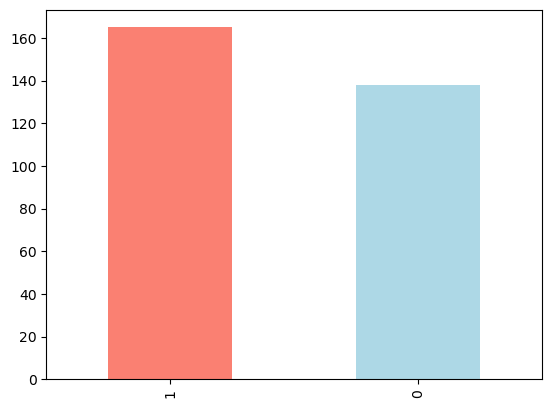

In [14]:
# To get better understandment we use bar graph for visualising
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Are there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency according to Sex

In [19]:
df["sex"].value_counts() # 1-male,0-female

1    207
0     96
Name: sex, dtype: int64

In [119]:
# Compare target column with sex column
cd=pd.crosstab(df["target"],df["sex"])

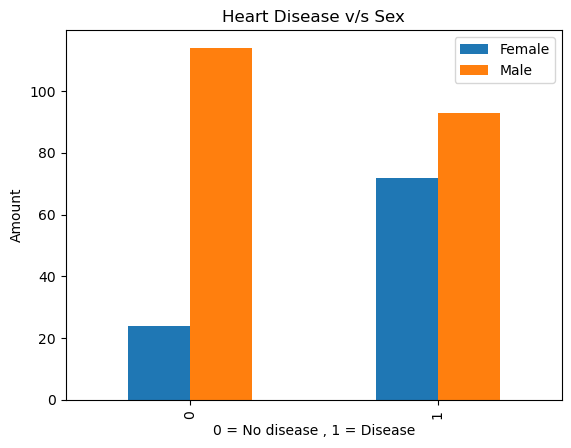

In [40]:
# Creater a plot of crosstab
plt=cd.plot(kind="bar");
plt.set_title("Heart Disease v/s Sex")
plt.set_xlabel("0 = No disease , 1 = Disease")
plt.set_ylabel("Amount")
plt.legend(["Female","Male"]);


In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Thalach v/s Age

In [45]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

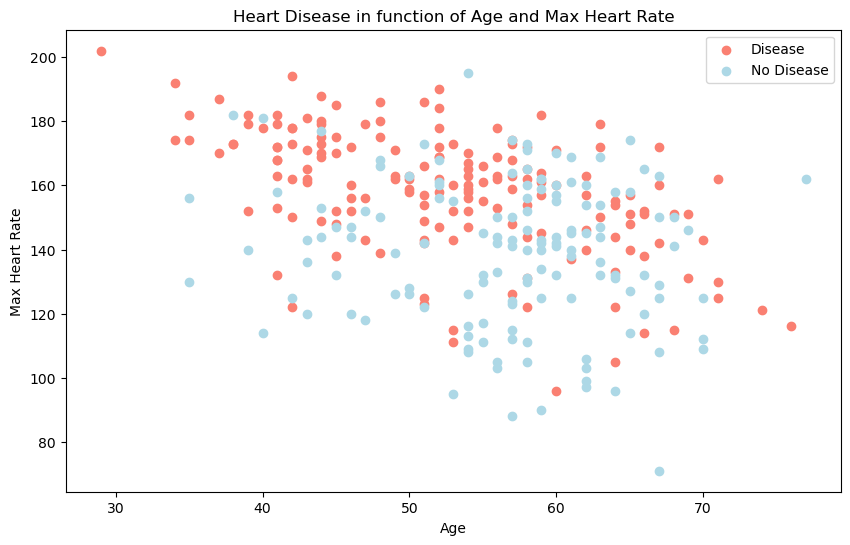

In [57]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

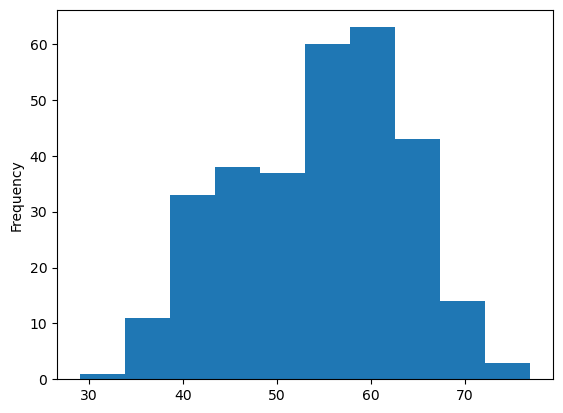

In [59]:
# check the distribution of age with histogram
df.age.plot.hist();

### Heart Disease v/s Chest Pain

In [120]:
che = pd.crosstab(df.cp,df.target)

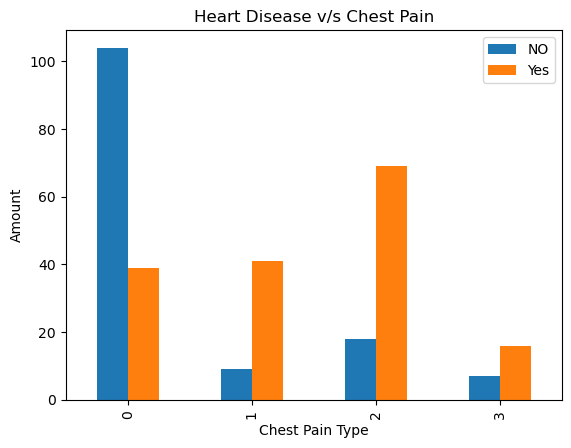

In [70]:
che.plot(kind="bar")
plt.title("Heart Disease v/s Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NO","Yes"]);

In [71]:
# MAke a corelatiion matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


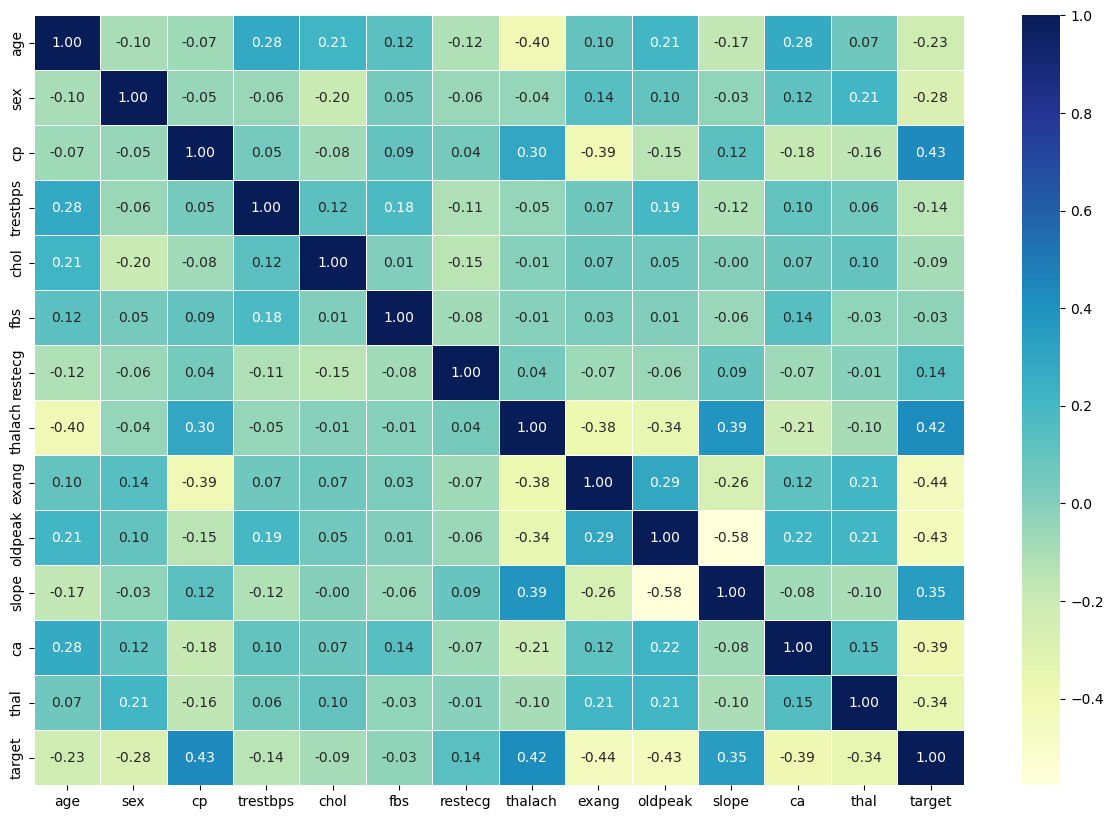

In [82]:
# Lets make our corelation matrix pretier
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

## 5. Modelling 

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
# Split data to x and y
x = df.drop("target",axis=1)
y = df.target

# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

Now we have split the data into training and test sets, it is time to build a machine learning model.

we'll train it on train set(find the pattern)

we'll test it on test set(use the pattrn)

we are going to try 3 ML models:
1. LogisticRegression
2. K-Nearest Neighbours Classifier
3. RandomForestClassifier

In [127]:
y_train.shape

(242,)

In [144]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [145]:
model_scores = fit_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\adith\Desktop\ML\heart_disease_proj\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

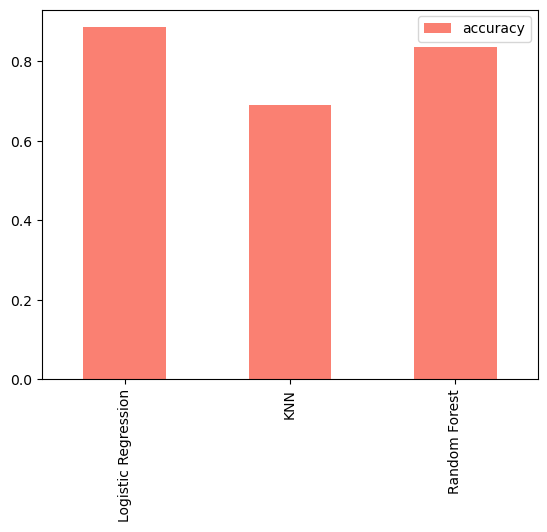

In [148]:
### Model comparisoon
model_comp= pd.DataFrame(model_scores,index=["accuracy"])
model_comp.T.plot.bar(color=["salmon"])

we have got baseline model and we know a models first prediction are'nt always what we should based our next stepsoff.
What should we do next?

* Hyperparameter tuning (By hand,Randomizedsearchcv,GridSearchCv)
* Feature Importance
* Cross-Validation
* Confusion matrix
* Precision
* Recall
* Classifiaction report
* ROC / AUC


### Hyper parameter tuning by hand

In [156]:
# lets tune KNN

train_scores=[]
test_scores=[]

# Create a list of diff values for n-neighbours
neighbors=range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)     # U cn adjust the parameters of the model using set params

    #Fit
    knn.fit(x_train,y_train)

    # update train scores list
    train_scores.append(knn.score(x_train,y_train))

    # Update test scores list
    test_scores.append(knn.score(x_test,y_test))

In [158]:
train_scores, test_scores


([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on the test data: 75.41%


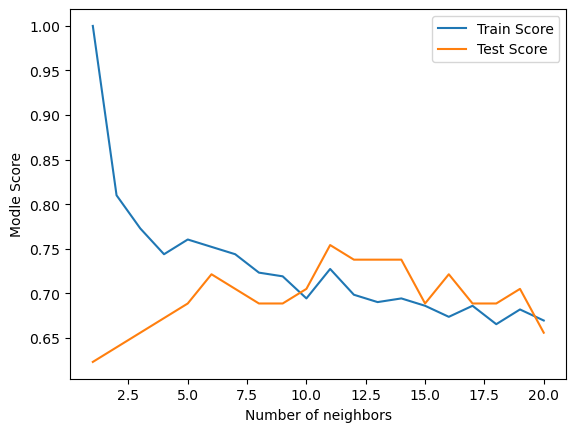

In [159]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Modle Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparametr tuning with randomized searchcv

In [180]:
# create a hyper perameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
# Create hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

NOw we have got hyperparam grid for each of the model lets tune them using RamdomizedSearchCv 

In [164]:
# Tune LogisticRegression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                            verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [165]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [166]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [174]:
# Tune RandomFOrest
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True
                            )
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [175]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [176]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [177]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### with GridSearchCV


In [181]:
#tuning logisticRegression()
lreg_gs=GridSearchCV(LogisticRegression(),
                     log_reg_grid,
                      cv=5,
                    verbose=True)
lreg_gs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [182]:
lreg_gs.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [183]:
lreg_gs.score(x_test,y_test)

0.8852459016393442

In [184]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned Machine Learnig  classifier, beyond accuracy

* ROC/AUC
* Confusion matrix
* Classification Report
* Precision = 1(MODEL TAT PRODUCES NO FALSE POSITIVE-bottom left column     of confusion matrix)
* Recall = 1 (MODEL TAT PRODUCES NO FALSE Negative-top right column of     confusion matrix)
*  F1score (Combination of Recall and precison)

To make comparison and evaluate our trained model first we need to make predictions

In [187]:
# Make prediction
y_preds=lreg_gs.predict(x_test)

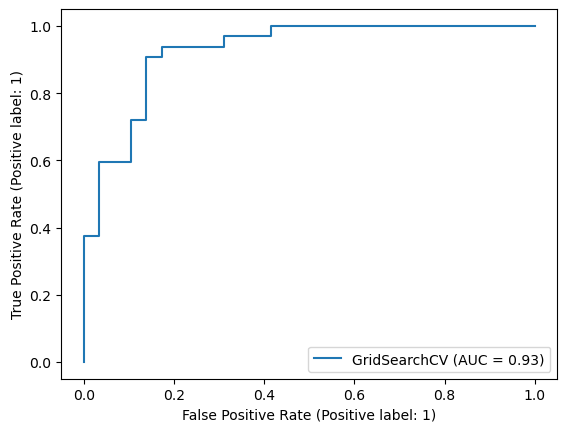

In [209]:
# ROC curve / AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lreg_gs, x_test, y_test)

In [210]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


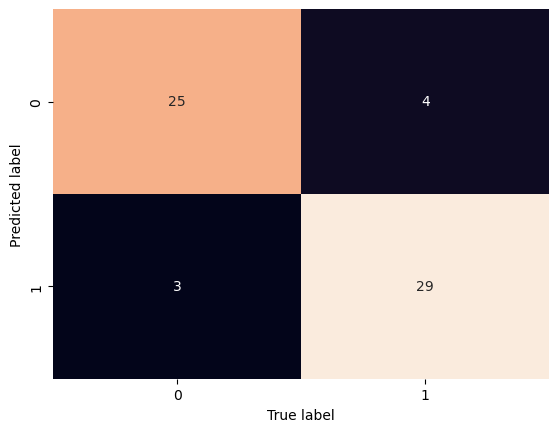

In [219]:
# Visualse confusion matrix


def plot_conf_mat(y_test,y_preds):
    fig, ax =plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)


Now we have got ROC/AUC and Confusion matric now classification refort recall f1 and precision

In [220]:
print(classification_report(y_test,y_preds)) # done only one one set not cross validation

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using cross-validation

we'll be calculating precision score,recall,f1 using cross_validation usin cross_val_score

In [227]:
# Cross_validated accuracy
cv_acc=cross_val_score(lreg_gs,x,y,cv=5,scoring="accuracy")
acc_cv=np.mean(cv_acc)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [229]:
# Cross_validated precision
cv_pres=cross_val_score(lreg_gs,x,y,cv=5,scoring="precision")
preci_acc=np.mean(cv_acc)
preci_acc

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8413661202185793

In [233]:
# Cross_validated recall
cv_recall=cross_val_score(lreg_gs,x,y,cv=5,scoring="recall")
recall_cv=np.mean(cv_recall)
recall_cv

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.9151515151515153

In [232]:
# Cross_validated f1
cv_f1=cross_val_score(lreg_gs,x,y,scoring="f1")
f1_cv=np.mean(cv_f1)
f1_cv

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.86406124093473

<Axes: title={'center': ' cross validated matrix'}>

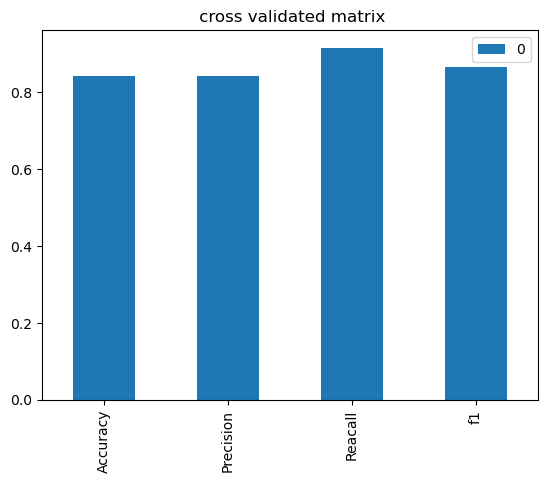

In [239]:
# Visualze our cross validated matrix
cv_metrics = pd.DataFrame({"Accuracy":acc_cv,
                            "Precision":preci_acc,
                            "Reacall":recall_cv,
                            "f1":f1_cv},
                           index=[0])
cv_metrics.T.plot(title=" cross validated matrix",kind="bar")

### Feature Importance

it is an another way of asking which feature contributed most to the outcomes of the model how did they contribute

finding feature importance is diff for each machine learning model one way find is to search in google

Lets find the feature importance of our LogicRegression model

In [247]:
# Fit a instance of logisticRegressionl
clf=LogisticRegression(C=0.20433597178569418, solver= 'liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [248]:
# Check coef_ (one of the feature importance)
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [251]:
# MAtch coefs of features to colums
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict


{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<Axes: title={'center': 'Feature Importance'}>

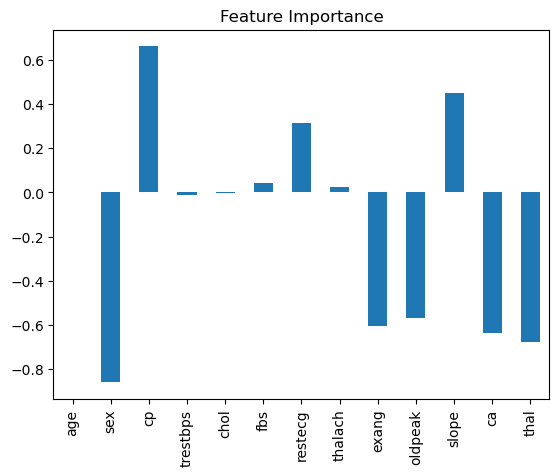

In [255]:
# Visualise feature importance
pd.DataFrame(feature_dict,index=[0]).T.plot.bar(title="Feature Importance",legend=False)

In [257]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?